# 초기모델

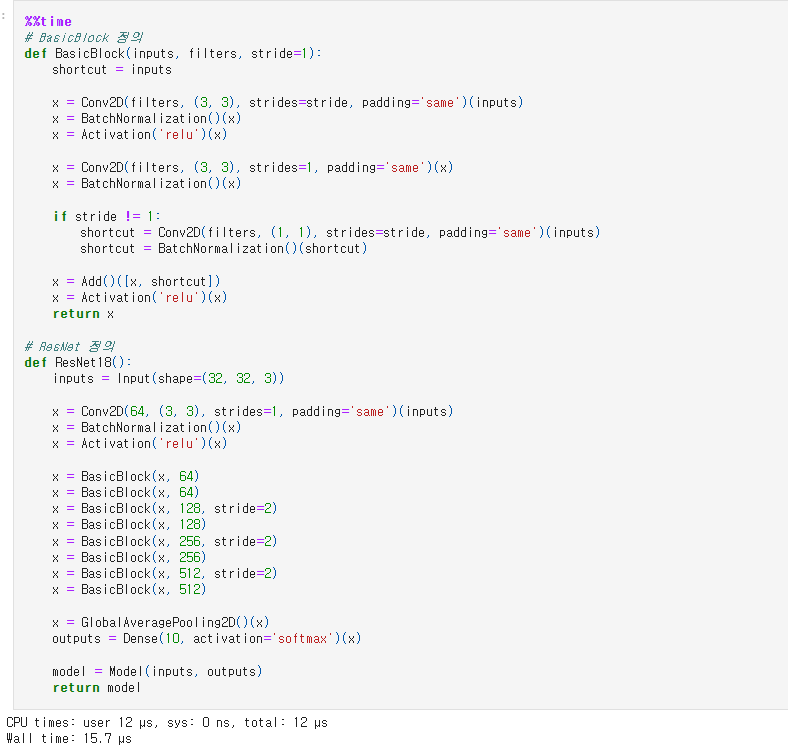
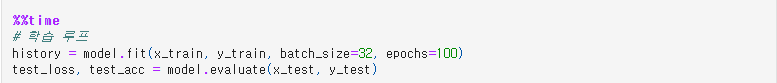

Baseline 에폭 100회 연산 시간 : 1: 41 : 29 <br>
Train acc : 0.99 <br>
Test acc : 0.85 <br>
Test loss : 1.0745 <br>

# TEST01 : batch-size = 64

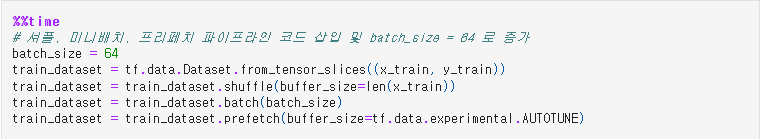

# 정확도 및 소요시간

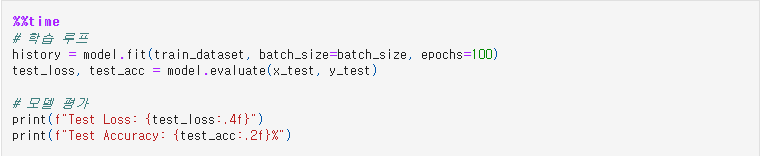
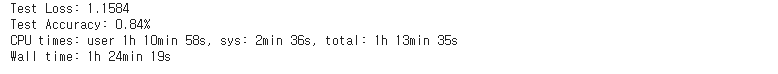


두 번째 셀에 셔플, 미니배치, 프리페치 파이프라인 코드 삽입 및 batch_size = 64 로 증가시켰다. 그 결과 에폭 100회 연산 시간 : 1: 24 : 19, Train acc : 0.99, Test acc : 0.84 <br>
Baseline의 평균 에폭 시간이 61초 였는데 평균 에폭 시간이 50초로 1/6 감소하였다. 더 감소 하는지 체크 해보자

# TEST02 : batch-size = 128

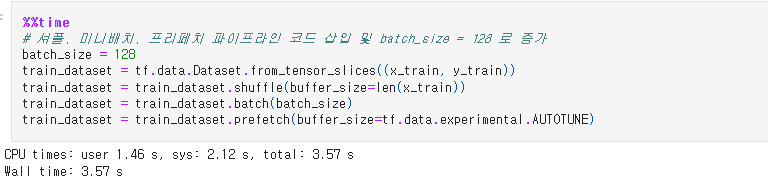

# 정확도 및 소요시간

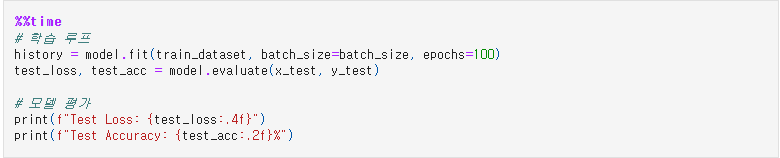
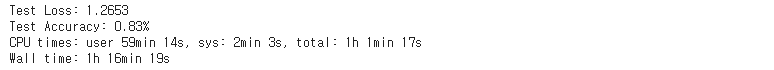

batch_size = 128 로 증가 그 결과 에폭 100회 연산 시간 : 1: 16 : 19로 더 줄어들었다. Test01의 평균 에폭 시간이 50초 였는데 평균 에폭 시간이 44초로 감소한 것을 확인할 수 있다. batch_size를 2배 늘렸으나 개인적인 예상인 40초로 평균 에폭시간이 감소될줄 알았으나 그만큼 감소하지는 않았다. Test03를 통해 얼마나 더 감소하는지 체크해보자

# TEST03 : batchi-size = 512

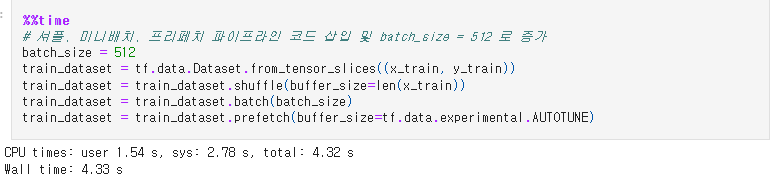

# 정확도 및 소요시간

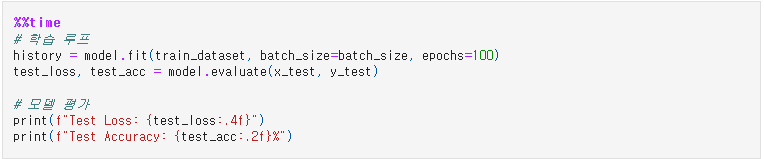
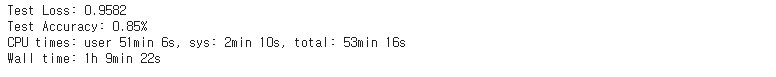

batch_size = 512 로 증가 그 결과 에폭 100회 연산 시간 : 1: 09 : 22로 줄어들긴 했다. Test02의 평균 에폭 시간이 44초 였는데 평균 에폭 시간이 40초로 감소한것을 확인할 수 있다. batch_size를 늘릴 수록 연산시간이 감소가 되지만 그에 비해 Train, test acc 의 값이 떨어지지 않는 점을 확인할 수 있다. 다만 그러면 셔플,미니배치 등의 파이프라인 작업이 유의미한 성과를 나타내는지가 분명하게 관찰할 수가 없다. Test04에서는 Baseline에서 batch_size 만 늘리고, 파이프라인 작업은 실행하지 않은채로 얼마나 연산속도가 감소하는지 관찰해보자


# TEST04 : batch-size = 64, 셔플, 미니배치, 프리페치 파이프라인 코드X
# 정확도 및 소요시간

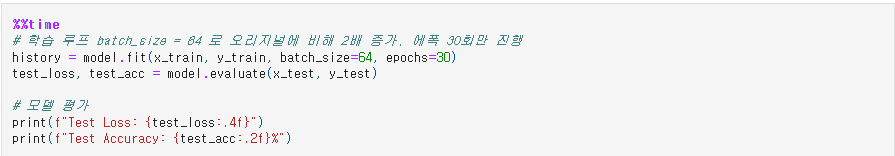
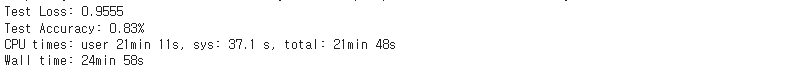

batch_size = 64로 증가 & 에폭 30회 실행 그 결과 에폭 30회 연산 시간 : 24 : 58 Test01과 비교를 해보자 (Test01 에폭 100회 연산 시간 : 1: 24 : 19) <br>
에폭 30회 연산을 초로 환산 : (24* 60) + 58 = 1,498 <br>
환산된 값에 10/3을 곱셈 : 1,498 / 3 * 10 = 4,993 <br>
4,993 / 60 = 83.22 = 약 1시간 23 분 13초 <br>
약 1분 정도의 차이만 나는 점을 보여 파이프라인 작업이 큰 유의미성을 못뛰우는 점으로 확인이 된다. Test05에서 batch_size만 늘려보고 관찰해보자.

# TEST05 : batch-size = 128, 셔플, 미니배치, 프리페치 파이프라인 코드X
# 정확도 및 소요시간

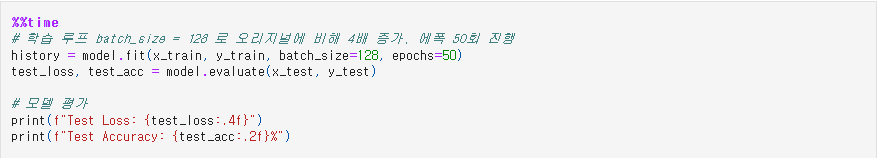
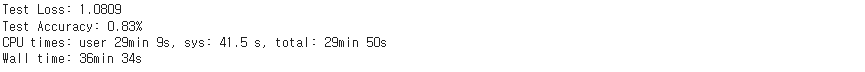

에폭 50회 연산 시간 : 36 : 34 그리고 Test02과 비교해보자 (Test02 에폭 100회 연산 시간 : 1: 16 : 19) <br>
에폭 50회 연산을 초로 환산 : (36* 60) + 34 = 2,194 <br>
환산된 값에 10/5을 곱셈 : 2,194 / 5 * 10 = 4,388 <br>
4,388 / 60 = 73.13 = 약 1시간 13 분 8초 <br>
배치 증가로 에폭당 평균속도는 6초씩 줄어 들은것으로 관찰되나, 파이프라인 작업으로는 약 3분 정도 감소한 것으로 추정이 가능하다.

# 결과 

파이프라인 작업으로는 유의미한 속도를 내는 점은 없으나, 배치사이즈를 늘리는 것은 큰 의미가 있는 것으로 관찰이된다.
